# INFO 2950 - Project Phase II
---

By: David Fleurantin (djf252) and Meredith Hu (mmh264)
</br>
GitHub: https://github.com/DavidFleurantin/INFO-2950-Final-Project
</br>
Google Drive Link: https://drive.google.com/drive/folders/1afEt08iEISR9dxVcrv-lBQych2ZslX0d?usp=sharing

In [2]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://cdn.shopify.com/s/files/1/0072/7315/2579/articles/wallstreet_blog_grande.jpg?v=1598894414")

## Overview 
---

In January 2021, a short squeeze of the stock of the American video game retailer GameStop (NYSE: GME) and other securities took place, causing major financial consequences for certain hedge funds and large losses for short sellers. Approximately 140 percent of GameStop's public float had been sold short, and the rush to buy shares to cover those positions as the price rose caused it to rise even farther. The short squeeze was initially and primarily triggered by users of the subreddit r/wallstreetbets, an Internet forum on the social news website Reddit, although a number of hedge funds also participated. At its height, on January 28, the short squeeze caused the retailer's stock price to reach a pre-market value of over US \\$500 per share, nearly 30 times the \\$17.25 valuation at the beginning of the month. The price of many other heavily shorted securities also increased.

-[Wikipedia](https://en.wikipedia.org/wiki/GameStop_short_squeeze)

---
## Research Question(s)

1. Does frequency of Reddit posts that mention GameStop (GME) correlate in a significantly statistical way in a price increase for GME stock.

2. There are two ways we can analyze how much the reddit online community influenced the actual stock price of GME - one way is analyzing the goodness of fit between the frequency of posts and the rate of the stock's increase, and the second is by analyzing how different the pattern and regularity of growth looks in two disparate periods of growth for GME stock.


## Data Collection and Cleaning

This project will employ two primary data sets
- #### Reddit posts and necessary metadata sourced from r/wallstreetbets over a 2 month span (Jan 28 - Present)
- #### Intraday GameStop (GME) stock data over a 2 month in 30 minute intervals (Jan 18 - Present)

Below is a documentation of every step that will take raw data file(s) and turn them into analysis-ready data that will be utilized throughout the remainder of our project.

#### r/wallstreetbets Posts and Metadata

The resulting dataset will be sourced directly from [Kaggle](https://www.kaggle.com/gpreda/reddit-wallstreetsbets-posts). An attempt was first made to source the data from Reddit's own api. However, this approach proved to be complicated as reddit does not allow access to posts too far back or allow direct query search. Likewise, the process to collect 1000s of posts would have resulted in too many api calls. The [Kaggle](https://www.kaggle.com/gpreda/reddit-wallstreetsbets-posts) dataset direct solves this issue and allowed to directly focus on the relevant time frame that we wanted that captured the phenomenon of GameStop's volatile and fluctuating stock price.

After downloading the csv from [Kaggle](https://www.kaggle.com/gpreda/reddit-wallstreetsbets-posts), let's convert it to a pandas dataframe ('reddit_data' and print out the first few rows to better gauge what we are dealing with.

In [224]:
## load data
reddit_data = pd.read_csv("reddit_wsb.csv")

print([x for x in reddit_data.columns])
reddit_data.head()

['title', 'score', 'id', 'url', 'comms_num', 'created', 'body', 'timestamp']


,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56


The data appears to be nicely organized. However, the 'created', 'url', and 'id' columns would be useless in our planned analysis. Let's remove these from the dataframe.

In [243]:
reddit_data = reddit_data.drop(columns=['url', 'id', 'created'])

reddit_data.head()

,title,score,comms_num,body,timestamp
0,"It's not about the money, it's about sending a...",55,6,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,23,NaN,2021-01-28 21:32:10
2,Exit the system,0,47,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,74,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,156,NaN,2021-01-28 21:26:56


Reddit gives users the option to provide a body to whatever topic that they post. Sometimes posts that generate alot of traffic have no body at all! The 'body' column is not much of particular direct interest and would. However we felt that it was necessary to capture the length of each post body if it was provided using numerical values.   

In [250]:
reddit_data['body'][2]

'The CEO of NASDAQ pushed to halt trading “to give investors a chance to recalibrate their positions”.\n\n[https://mobile.twitter.com/Mediaite/status/1354504710695362563](https://mobile.twitter.com/Mediaite/status/1354504710695362563)\n\nNow SEC is investigating, brokers are disallowing buying more calls. This is the institutions flat out admitting they will change the rules to bail out the rich but if it happens to us, we get a “well shucks you should have known investing is risky! have you tried cutting out avocados and coffee, maybe doing Uber on the side?”\n\nWe may have collectively driven up enough sentiment in wall street to make other big players go long on GME with us (we do not have the money to move the stock as much as it did alone). we didn’t hurt wall street as a whole, just a few funds went down while others went up and profited off the shorts the same as us. The media wants to pin the blame on us.\n\nIt should be crystal clear that this is a rigged game by now. Its time

In [253]:
print("Length of the post body is {}".format(len(reddit_data['body'][2])))

Length of the post body is 1319


We can start by converting each string to character lenght using the [str.len()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.len.html) function for pandas series. Notice for row 3 that the post body is also 1319 like before.

In [263]:
reddit_data['body'] = reddit_data['body'].str.len()

reddit_data.head()

,title,score,comms_num,body,timestamp
0,"It's not about the money, it's about sending a...",55,6,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,23,NaN,2021-01-28 21:32:10
2,Exit the system,0,47,1319.0,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,74,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,156,NaN,2021-01-28 21:26:56


Next we can convert the NaN values in the body column back into 0s. This will indicate that the post has no body.

In [300]:
reddit_data = reddit_data.fillna(0)

reddit_data.head()

,title,score,comms_num,body,timestamp
0,"It's not about the money, it's about sending a...",55,6,0.0,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,23,0.0,2021-01-28 21:32:10
2,Exit the system,0,47,1319.0,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,74,0.0,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,156,0.0,2021-01-28 21:26:56


Let's now examine the 'timestamp' column.

In [304]:
time = reddit_data['timestamp'][0]
print(type(time))

<class 'str'>


Each timestamp is a string object, it would be more useful to convert each time to a datetime object as it would make for easier comparison.

In [312]:
reddit_data['timestamp'] = pd.to_datetime(reddit_data['timestamp'], format = '%Y-%m-%d %H:%M:%S')

In [314]:
time = reddit_data['timestamp'][0]
print(type(time))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Let's do a simple comparison to test out the power of datetime

In [317]:
time_2 = reddit_data['timestamp'][1]
time > time_2

True

The Above result makes sense since the dataset is already sorted by post timestamp in decreasing order.

The r/wallstreetbets dataset is ready for use!

#### Intraday GameStop (GME) Stock Data

Our original intention was to utilize this [Kaggle](https://www.kaggle.com/xiaonhuang/gamestop-stock-data) data set or others of a similar basis. We determined that this would not yield good analyis as the stock prices were tracked only on a daily basis. While good for analyzing GME stock over a long term basis, the data would have failed to meet our needs since we wanted to hyper focus on relatively short and specific window in time. We therefore needed intraday day (stock prices within each day) data that we could query over the past two months (late January to March). After much research we settled on using [Alpha Vantage's Free API](https://www.alphavantage.co/). The API allows users to query relevant stock data through JSON while also featuring a convenient Python wrapper.

Here is the documentation for the [API](https://www.alphavantage.co/documentation/) and the [Python Wrapper](https://github.com/RomelTorres/alpha_vantage)

Let's first make sure that Alpha Vantage is correctly installed as it required for us to proceed. 

In [218]:
#install alpha vantage dependecy
import sys
!{sys.executable} -m pip install alpha_vantage pandas

Next let's import the necessary package as well as document our personal API key that we recieved after signup on the website.

In [220]:
from alpha_vantage.timeseries import TimeSeries
api_Key = 'KEAXGCPUD9F322NN'
ts = TimeSeries(key = api_Key, output_format = 'csv')

Now let's grab the GME data using the API. (* Note - Do not run this cell many times, you are limited to 5 calls every 5 minutes and 500 every day). 

In [227]:
#download the csvs
gme_data_month_1 = ts.get_intraday_extended(symbol = 'GME', interval = '30min', slice = 'year1month2')
gme_data_month_2 = ts.get_intraday_extended(symbol = 'GME', interval = '30min', slice = 'year1month1')

The above api calls work as follows. [ts.get_intaday_extended](https://www.alphavantage.co/documentation/) returns historical intraday time series of a given equity (GME in our case) for the trailing 2 years, covering over 2 million data points per ticker. The argument 'symbol' is the name of the equity of your choice. The argument 'interval' is the time interval between two consecutive data points in the time series. The following values are supported: 1min, 5min, 15min, 30min, 60min. The arguemnt slice is the desired trailing 2 years of intraday data is evenly divided into 24 "slices". Each slice is a 30-day window, with year1month1 being the most recent and year2month12 being the farthest from today.

Since we wanted to focus deeply on GME over the last two months, we used 30min intervals and 'year1month2' and 'year1month1' time slices. The api called returned a csv objects that we can easily minuplate by converting to pandas dataframe.

In [228]:
#csv --> dataframe
gme_data_month_1 = pd.DataFrame(list(gme_data_month_1[0]))
gme_data_month_2 = pd.DataFrame(list(gme_data_month_2[0]))

Let's see how one looks.

In [232]:
gme_data_month_2.head()

,0,1,2,3,4,5
0,time,open,high,low,close,volume
1,2021-03-19 20:00:00,199.31,199.4,198.5601,199.0,14316
2,2021-03-19 19:30:00,199.98,199.99,199.2,199.3,6403
3,2021-03-19 19:00:00,199.1,200.0,199.0,200.0,15086
4,2021-03-19 18:30:00,200.24,200.29,199.01,199.4,20833


It's a good start, but lets modify the columns and index to make things more uniform and save the dataframe to a csv. It is necessary to save the data to a csv since we don't want to be calling the Alpha Vantage Api every time we want to look at the data. Also, the api reports live data, so it would be important to cutoff the data at a certain point. 

In [233]:
#setup of column and index
header_row=0
gme_data_month_1.columns = gme_data_month_1.iloc[header_row]
gme_data_month_2.columns = gme_data_month_2.iloc[header_row]

gme_data_month_1 = gme_data_month_1.drop(header_row)
gme_data_month_2 = gme_data_month_2.drop(header_row)

gme_data_month_1 = gme_data_month_1.reset_index()
gme_data_month_2 = gme_data_month_2.reset_index()

gme_data_month_1 = gme_data_month_1.drop(columns=['index'])
gme_data_month_2 = gme_data_month_2.drop(columns=['index'])

#save dataframes to csv
gme_data_month_1.to_csv(r'./gme_month_1.csv')
gme_data_month_2.to_csv(r'./gme_month_2.csv')

Let's open the csv files which should be saved to the root folder of the project.

In [239]:
gme_data_month_1 = pd.read_csv("gme_month_1.csv")
gme_data_month_2 = pd.read_csv("gme_month_2.csv")

gme_data_month_1.head()

,Unnamed: 0,time,open,high,low,close,volume
0,0,2021-02-17 20:00:00,46.1999,46.45,46.1700,46.45,16394
1,1,2021-02-17 19:30:00,46.0801,46.25,46.0801,46.24,2989
2,2,2021-02-17 19:00:00,46.2500,46.25,46.1000,46.10,4796
3,3,2021-02-17 18:30:00,46.1300,46.40,46.0800,46.20,11222
4,4,2021-02-17 18:00:00,46.0000,46.45,46.0000,46.28,23431


This is much better, but we seemed to have added a 'unamed: 0' column into our dataframe. Let's simply drop it.

In [240]:
gme_data_month_1 = gme_data_month_1.drop(columns=['Unnamed: 0'])
gme_data_month_2 = gme_data_month_2.drop(columns=['Unnamed: 0'])


In [320]:
gme_data_month_2.columns
gme_data_month_2.head()

,time,open,high,low,close,volume
0,2021-03-19 20:00:00,199.3100,199.40,198.5601,199.00,14316
1,2021-03-19 19:30:00,199.9800,199.99,199.2000,199.30,6403
2,2021-03-19 19:00:00,199.1000,200.00,199.0000,200.00,15086
3,2021-03-19 18:30:00,200.2400,200.29,199.0100,199.40,20833
4,2021-03-19 18:00:00,199.5972,200.40,199.5500,200.24,14931


Now let's combine the two dataframes for each month into 1 dataframe that we will use for analysis later.

In [333]:
print("Total obs in month 1 = {}".format(gme_data_month_1.shape[0]))
print("Total obs in month 2 = {}".format(gme_data_month_2.shape[0]))
print("Total obs in both month 1 and 2 = {}".format(gme_data_month_1.shape[0] + gme_data_month_2.shape[0]))

Total obs in month 1 = 668
Total obs in month 2 = 704
Total obs in both month 1 and 2 = 1372


In [328]:
gme_data = gme_data_month_2.append(gme_data_month_1, ignore_index=True)
print(gme_data.value_counts())
gme_data.head()


time                 open      high      low       close   volume 
2021-03-19 20:00:00  199.3100  199.4000  198.5601  199.00  14316      1
2021-02-08 12:00:00  60.0786   60.3099   58.0200   59.65   1592647    1
2021-02-08 08:00:00  70.0000   70.6000   68.6200   69.48   150283     1
2021-02-08 08:30:00  69.3900   73.0000   67.0000   68.05   344703     1
2021-02-08 09:00:00  68.0700   69.5500   67.2000   69.55   165473     1
                                                                     ..
2021-03-01 16:30:00  119.6500  123.3100  116.2600  121.13  634178     1
2021-03-01 17:00:00  121.4300  121.4300  115.3900  115.54  306162     1
2021-03-01 17:30:00  115.7900  120.4000  115.0000  117.00  149027     1
2021-03-01 18:00:00  117.2000  118.6500  116.0000  117.49  98061      1
2021-01-19 04:30:00  39.0000   42.6100   38.3100   40.01   66152      1
Length: 1372, dtype: int64


,time,open,high,low,close,volume
0,2021-03-19 20:00:00,199.3100,199.40,198.5601,199.00,14316
1,2021-03-19 19:30:00,199.9800,199.99,199.2000,199.30,6403
2,2021-03-19 19:00:00,199.1000,200.00,199.0000,200.00,15086
3,2021-03-19 18:30:00,200.2400,200.29,199.0100,199.40,20833
4,2021-03-19 18:00:00,199.5972,200.40,199.5500,200.24,14931


We have successfully combined the two months together as our new dataframe has the correct total of 1372 observations.

Let's now examine the 'time' column.

In [335]:
time = gme_data['time'][0]
print(type(time))

<class 'str'>


Each times is a string object, it would be more useful to convert each time to a datetime object as it would make for easier comparison.

In [338]:
gme_data['time'] = pd.to_datetime(gme_data['time'], format = '%Y-%m-%d %H:%M:%S')

In [340]:
time = gme_data['time'][0]
print(type(time))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Let's do a simple comparison to test out the power of datetime

In [341]:
time_2 = gme_data['time'][1]
time > time_2

True

The Above result makes sense since the dataset is already sorted by decreasing times interval for stock prices.

Our two dataframes for GME data are properly indexed and ready for use!

---
## Data Description

**1 For what purpose was the dataset created? Was there a specific task in mind? Was there a specific gap that needed to be filled?**
   - Reddit data - was created to capture the sentiments of r/wallstreetbets in their posts during the meteoric rise of GME stock. WallStreetBets (r/wallstreetbets, also known as WSB), is a subreddit where participants discuss stock and option trading. It has become notable for its profane nature and allegations of users manipulating securities. Recently the community became mainstream again with its interest on GameStop shares.
   - GME stock data - was created out of a need to source intraday stock data.
    
**2. Who created the dataset and on behalf of which entity?**
   - Reddit - Data Scientist and Kaggle contributor, [Gabriel Preda](https://www.kaggle.com/gpreda), to satisfy a research need 
   - GME - [Alpha Vantage](https://www.alphavantage.co/#about)

**3. What do the instances that comprise the dataset represent?**
   - Reddit - the data contains the 'title', 'score', 'url', 'number of comments', 'time of creation', 'post body', 'timestamp', and associated 'post id'. All of these instances serve to identify exactly 1 r/wallstreetbets post by a user at a particular time.
   - GME - the data records'open price' 'high price' 'low price' 'close price' 'volume traded' over a 30min 'time' interval. 
    
**4. How many instances are there in total?**
   - Reddit - There are 42552 total posts captured
   - GME - There are 1372 total 30min intervals of stock prices recorded.
    

**5. How was the data associated with each instance acquired? Was the data directly observable, reported by subjects, or indirectly inferred/derived from other data? If data was reported by subjects or indirectly inferred/derived from other data, was the data validated/verified?**
   - Reddit - the data was downloaded from https://www.reddit.com/r/wallstreetbets/ using praw (The Python Reddit API Wrapper) by the dataset's creator.
   - GME - Alpha Vantage partnered with major exchanges and institutions around the world to become a leading provider of stock APIs as well as forex (FX) and cryptocurrency data feeds.
 
**6. Does the dataset contain all possible instances or is it a sample of instances from a larger set? If thedataset is a sample, then what is the larger set? Is the sample representative of the larger set?**
   - Reddit - the data det is any actively growing sample of all r/wallstreetbets posts from Jan. 28, 2021 to present. Around Jan. 28, r/wallstreetbets was at its peak in media attention and conicided with the peak of GME stock. The sample may not be representative of the larger set since post topics on Reddit are not static (i.e. what users post today may not mirror the topics that they will post about tommorrow).
   - GME - the data is part of the last two months of GME's stock activity. The sample may not be representative of the larger set since GME was a very volitale stock. For example GME was trading below 20 dollars a year ago.
    
**7. Over what timeframe was the data collected? Does this timeframe match the creation timeframe of the data associated with the instances?**
   - Reddit - From January 28, 2021 to present (March 19, 2021)
   - GME - From Jan 19, 2021 market open to present (March 19, 2021) market close.
   
**8. What data does each instance consist of? “Raw” data or features? In either case, please provide a description.**
   - Reddit - Raw user post data
   - GME - Raw stock price data

**9. Is any information missing from individual instances? If so, please provide a description, explaining why this information is missing.**
   - Reddit - some values in the 'body' column were NaN. This was done by the creator of the data set to indicate that the post had no post body.

**10. Does the dataset contain data that, if viewed directly, might be offensive, insulting, threatening, or might otherwise cause anxiety?**
   - Reddit - the data contains a copious amount of harsh language/emojis,which is used in a joking fashion, inside post titles and post bodies. The posts were not filtered in order to preserve the nature of r/wallstreetbets.
    
**11. Does the dataset relate to people? If not, you may skip the remaining questions in this section.**
   - Reddit - the data captures the direct posts of Reddit (a public social media platform) users.

**12. Is it possible to identify individuals, either directly or indirectly from the dataset?**
   - Reddit - it is not possible to identify users by their posts unless they choose to identify themselves in their post (self-doxxing). The usernames of each user are not provided in the dataset. However, the url of each post is identifed and can be used to find to the respective post on Reddit.


**14. Were the individuals in question notified about the data collection? Did the individuals in question consent to the collection and use of their data?**
   - Reddit - No. Reddit is a public platform where all posts are publicly visible. When r/wallstreetbets recieved increased media attention and its posts were documented by the media, users of the subreddit were either filled with pride/bravado or anger due to perceived misrepresentation of their posts. At points even CNBC (financial news) read r/wallstreetbets posts during TV broadcasts.

**15. Was any preprocessing/cleaning/labeling of the data done?.**
   - Reddit - The 'created', 'url', and 'id' columns would be useless in our planned analysis, so we removed them. Reddit gives users the option to provide a body to whatever topic that they post.The 'body' column is not much of particular direct interest and would. However we felt that it was necessary to capture the length of each post body if it was provided using numerical values. For example, a that is 1000 characters long would have a 'body' value of 1000 while a post with no body (NaN) would have a 'body' value of 0. The timestamp column was converted into a datetime object from a string inorder to enable easier comparisons.
   - GME - The indexing of the the data that was produced by the api was modified to be more in uniform with CS conventions. The API that was used was only able to generate a dataframe in 1 month time intervals. Since we wanted to examine 2 months, we generated two dataframes and merged the two into one dataframe while maintaing proper sorting by time. The time column was converted into a datetime object from a string inorder to enable easier comparisons.
    
**16. Is the software used to preprocess/clean/label the instances available? If so, please provide a link or other access point.**
   - Reddit - the dataset creator utilized [praw](https://praw.readthedocs.io/en/latest/) to scrape r/wallstreetbets posts
   - GME - [Alpha Vantage API](https://www.alphavantage.co/documentation/) and the [Python API Wrapper](https://github.com/RomelTorres/alpha_vantage)

**17. Where can your raw source data be found, if applicable? Provide a link to the raw data.**
   - Both datasets can be found here (Make sure to use Cornell Account) -> https://drive.google.com/drive/folders/1afEt08iEISR9dxVcrv-lBQych2ZslX0d?usp=sharing



---
## Data Limitations

**Reddit Dataset** - r/wallstreetbets post dataset is primarily limited by the time span in which the data was captured. The posts were recorded starting from Jan 28, 2021. This is one day after the peak stock price of GME on Jan. 27, 2021. It would have been nice to have data capturing posts before Jan 28, 2021 as we could better document user sentiment before GME's rise and its peak. The posts contain information not related to GameStop. This means we would have to find a way to filter relevant posts. We also converted the 'body' column to only record numerical character length instead of the actual body message. While this saves space, we lose possible insight about what each user is saying.

**GME Stock Price Dataset** - the stock price data is limited by the time intervals between each row instance. We decided to use 30min intervals. Using a smaller interval time such as 15min would increase granularity for analysis at the cost of more data observations. A smaller interval would combine nicely with the reddit dataset since that dataset tracks the exact time that each post was posted. 

---
## Exploratory Data Analysis

Let's begin by generating basic summary statisics for each dataset.

### Reddit Dataset

In [347]:
reddit_data.head()

,title,score,comms_num,body,timestamp
0,"It's not about the money, it's about sending a...",55,6,0.0,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,23,0.0,2021-01-28 21:32:10
2,Exit the system,0,47,1319.0,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,74,0.0,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,156,0.0,2021-01-28 21:26:56


Let's see a Basic Histogram for each column

In [346]:
reddit_data.columns

Index(['title', 'score', 'comms_num', 'body', 'timestamp'], dtype='object')

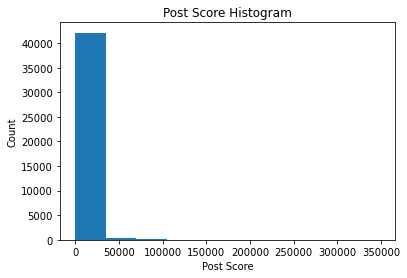

In [375]:
#post score
plt.hist(reddit_data["score"].to_list())
plt.xlabel("Post Score")
plt.ylabel("Count")
plt.title("Post Score Histogram")
plt.show()


There are only a few posts that recieve a high post score from other users.

In [374]:
reddit_data['score'].describe()

count     42553.00000
mean       1377.25453
std        8381.80570
min           0.00000
25%           1.00000
50%          25.00000
75%         166.00000
max      348241.00000
Name: score, dtype: float64

There appears to be a few posts that acts as a significant outlier on the score data. Alot of posts recieve little to no attention from reddit users.

In [378]:
reddit_data.nlargest(5, ['score'])

,title,score,comms_num,body,timestamp
19162,Times Square right now,348241,11554,0.0,2021-01-31 04:00:38
16009,GME YOLO update — Jan 28 2021,225870,23309,0.0,2021-01-29 07:06:23
17771,GME YOLO month-end update — Jan 2021,219779,20105,0.0,2021-01-30 07:04:45
34179,GME YOLO update — Feb 19 2021,201168,12846,0.0,2021-02-20 07:05:55
18273,It’s treason then,195782,4523,0.0,2021-01-30 09:40:59


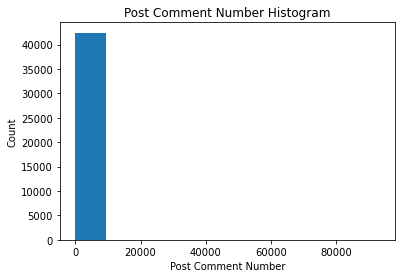

In [356]:

#post comment number
plt.hist(reddit_data["comms_num"].to_list())
plt.xlabel("Post Comment Number")
plt.ylabel("Count")
plt.title("Post Comment Number Histogram")
plt.show()


Each post does not have a lot of comments. There are alot of posts with no comments in fact. "Megathreads", a common feature on Reddit feature alot of comments naturally.

In [380]:
reddit_data['comms_num'].describe()

count    42553.000000
mean       203.011774
std       2441.833305
min          0.000000
25%          2.000000
50%         11.000000
75%         44.000000
max      93268.000000
Name: comms_num, dtype: float64

In [379]:
reddit_data.nlargest(5, ['comms_num'])

,title,score,comms_num,body,timestamp
39993,"GME Megathread for March 10, 2021",47667,93268,480.0,2021-03-10 23:30:11
17095,"Daily Discussion Thread for January 29, 2021",12288,89050,2393.0,2021-01-29 21:00:15
35110,"GME Megathread for Wednesday, February 24th, 2021",28975,83094,65.0,2021-02-25 00:24:58
17249,"Daily Discussion Thread for January 29, 2021 -...",7348,80926,2376.0,2021-01-30 02:23:51
17313,GME What About Second Breakfast Club Megathread,29356,80586,0.0,2021-01-30 01:26:04


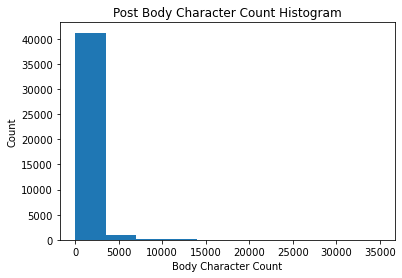

In [357]:
#post body length
plt.hist(reddit_data["body"].to_list())
plt.xlabel("Body Character Count")
plt.ylabel("Count")
plt.title("Post Body Character Count Histogram")
plt.show()

There are a lot of posts no body at all. There are only a few posts with alot of writing.

In [381]:
reddit_data['body'].describe()

count    42553.000000
mean       203.011774
std       2441.833305
min          0.000000
25%          2.000000
50%         11.000000
75%         44.000000
max      93268.000000
Name: comms_num, dtype: float64

In [383]:
reddit_data.nlargest(5, ['body'])

,title,score,comms_num,body,timestamp
17232,Gamestop Big Picture: The Short Singularity Pt...,320,94,34984.0,2021-01-30 02:40:55
37146,Dark DD and possible profit in the face of ano...,466,294,34520.0,2021-03-02 10:36:36
36697,History of short squeezes and corners,500,101,34328.0,2021-02-27 22:41:29
33111,Wall Street Week Ahead for the trading week be...,667,78,33147.0,2021-02-14 01:27:19
33045,MVIS: Shiny Laser Go Pew ⚡ No But Seriously Th...,1510,654,32889.0,2021-02-14 14:00:52


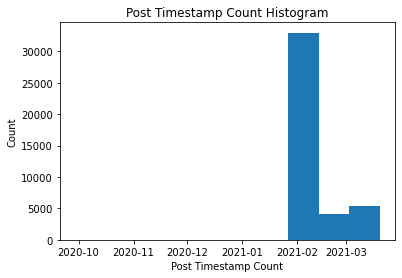

In [354]:
#post timestamp
plt.hist(reddit_data["timestamp"].to_list())
plt.xlabel("Post Timestamp Count")
plt.ylabel("Count")
plt.title("Post Timestamp Count Histogram")
plt.show()

There was a large concentration of posts in late January. This makes sense since during this time period there was increased activity during this time period.

In [385]:
reddit_data['timestamp'].describe(datetime_is_numeric = True)

count                            42553
mean     2021-02-07 22:48:01.325842944
min                2020-09-29 03:46:56
25%                2021-01-29 02:29:10
50%                2021-02-02 12:15:05
75%                2021-02-08 02:49:03
max                2021-03-19 18:33:32
Name: timestamp, dtype: object

We can observe some interesting patterns given the dataset.

In [387]:
post_body = sorted(reddit_data['body'].unique())

mean_score  = [reddit_data.where(reddit_data['body'] == length)['score'].mean() for length in post_body]

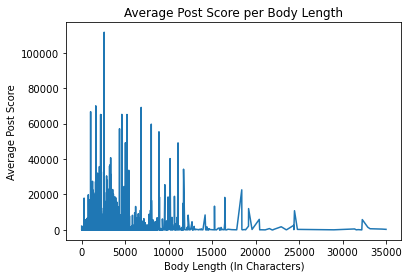

In [389]:
plt.plot(post_body, mean_score)
plt.xlabel('Body Length (In Characters)')
plt.ylabel('Average Post Score')
plt.title('Average Post Score per Body Length')
plt.show()

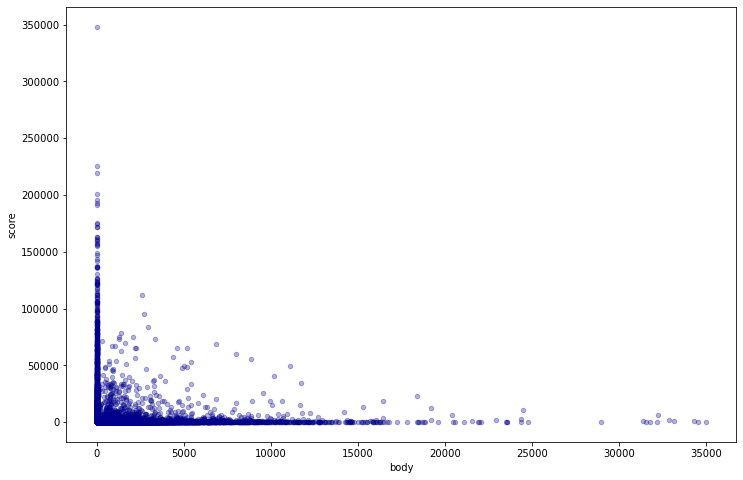

In [391]:
ax1 = reddit_data.plot.scatter(x='body',
                               y='score',
                               c='DarkBlue',
                               alpha = .3)

In [392]:
print("correlation coefficient b/w post body length and score = {}".format(reddit_data['body'].corr(reddit_data['score']))) 

correlation coefficient b/w post body length and score = -0.003861851724545893


Just because a reddit post is very long, it does not mean that it is rewarded with many upvotes. 'TLDR' is used on Reddit for a reason!

### GME Stock Price Dataset

In [358]:
gme_data.head()

,time,open,high,low,close,volume
0,2021-03-19 20:00:00,199.3100,199.40,198.5601,199.00,14316
1,2021-03-19 19:30:00,199.9800,199.99,199.2000,199.30,6403
2,2021-03-19 19:00:00,199.1000,200.00,199.0000,200.00,15086
3,2021-03-19 18:30:00,200.2400,200.29,199.0100,199.40,20833
4,2021-03-19 18:00:00,199.5972,200.40,199.5500,200.24,14931


In [359]:
gme_data.columns

Index(['time', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

Let's see a basic histogram for each column

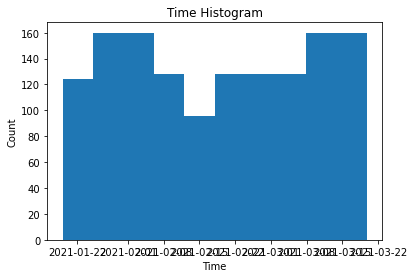

In [371]:
#time for each interval
plt.hist(gme_data["time"].to_list())
plt.xlabel("Time")
plt.ylabel("Count")
plt.title("Time Histogram")
plt.show()

The time histogram appears to be somewhat bimodal. This makes sense since because the market closes on friday at 4:30pm. 

The below histograms for opening, closing, low and high prices should roughly correspond in shape with each other in given that the data was collect along equal intervals. We should expect that the histograms are right skewed. This would corroborate with the voltile nature of the GME stock.

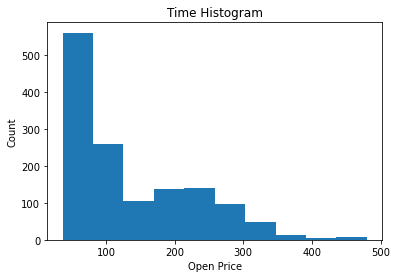

In [363]:
#open price for each interval
plt.hist(gme_data["open"].to_list())
plt.xlabel("Open Price")
plt.ylabel("Count")
plt.title("Open Price Histogram")
plt.show()

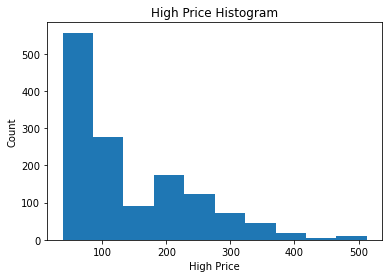

In [364]:
#open price for each interval
plt.hist(gme_data["high"].to_list())
plt.xlabel("High Price")
plt.ylabel("Count")
plt.title("High Price Histogram")
plt.show()

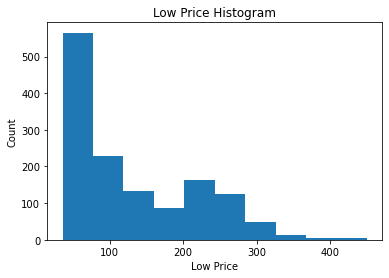

In [365]:
#low price for each interval
plt.hist(gme_data["low"].to_list())
plt.xlabel("Low Price")
plt.ylabel("Count")
plt.title("Low Price Histogram")
plt.show()

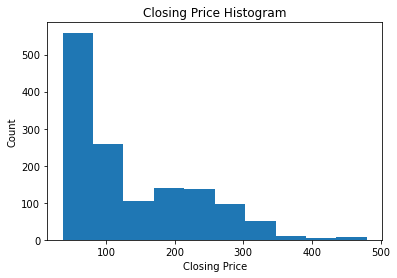

In [366]:
#open price for each interval
plt.hist(gme_data["close"].to_list())
plt.xlabel("Closing Price")
plt.ylabel("Count")
plt.title("Closing Price Histogram")
plt.show()

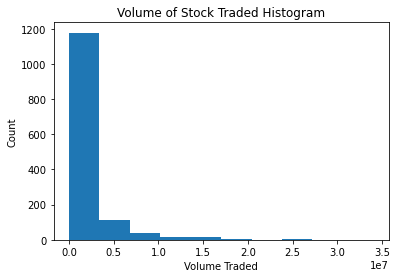

In [367]:
#open price for each interval
plt.hist(gme_data["volume"].to_list())
plt.xlabel("Volume Traded")
plt.ylabel("Count")
plt.title("Volume of Stock Traded Histogram")
plt.show()

Now let's plot the GME stock data over the two month interval. Our results should almost mirror the results of charts like this [here](https://www.tradingview.com/symbols/NYSE-GME/).

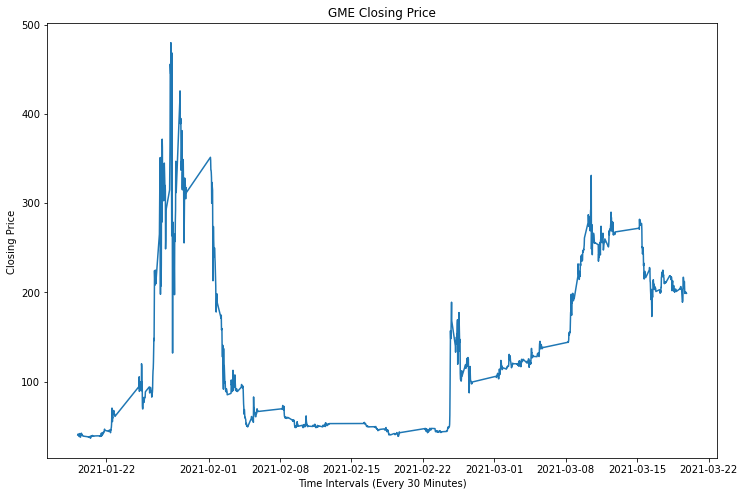

In [398]:
plt.plot(gme_data['time'], gme_data['close'])
plt.xlabel('Time Intervals (Every 30 Minutes)')
plt.ylabel('Closing Price ')
plt.title('GME Closing Price')
plt.show()

---
## Questions for Reviewers

1. Our r/wallstreetbets post data set features over 42000 posts not all talking about GME. What would be a good way to trim this down? Would a simple binary search on post titles suffice (i.e. filter posts by title if they contain GME, GameStop, or rocket emoji!?). Are there any basic language analysis technique that might be useful to build a more relevant to GME sub-sample of the data.

2. Do you feel that we have enough data or "columns" to perform our intended analysis?

3. Do you think we have enough information or too little? Is this project to ambitious or is having more data generally better even if we don't analyze it?

4. What type of research question should we focus on? Any suggestions?